In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("./data/master/master_apartaments_data_cleaned.csv", index_col = None, header=0)
print(df.sample(5))

                                     id      city               type  \
43033  b2002416febff4535732c18fb22bbf2b  warszawa           tenement   
23530  6e0098a36b81a07ef529e0608d6e4c7f  warszawa            Unknown   
20559  660ba433bb4f95c933e3482eca0e01c8   wroclaw            Unknown   
28969  148937122016fdb433613758926d07f9   wroclaw  apartmentBuilding   
26346  82ef6e1fa9b2d5bb062cb43802512d03    krakow  apartmentBuilding   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
43033         27.00    1.0    3.0         4.0     1946.0  52.214415   
23530         34.84    1.0    1.0         4.0     1964.0  52.243985   
20559         60.00    2.0    1.0         3.0       -1.0  51.098621   
28969         45.00    2.0    3.0         7.0     2020.0  51.113109   
26346         78.30    3.0    2.0         3.0     2017.0  50.037159   

       longitude  ...  buildingMaterial  condition  hasParkingSpace  \
43033  21.043538  ...             brick    Unknown               no  

Text(0.5, 0, 'Price (PLN)')

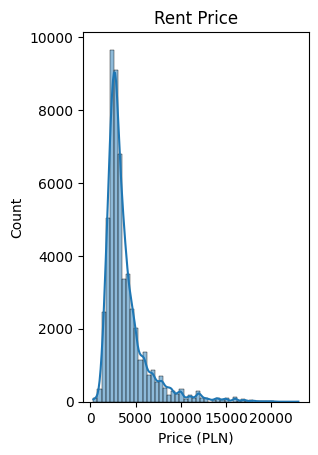

In [13]:
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Rent Price')
plt.xlabel("Price (PLN)")

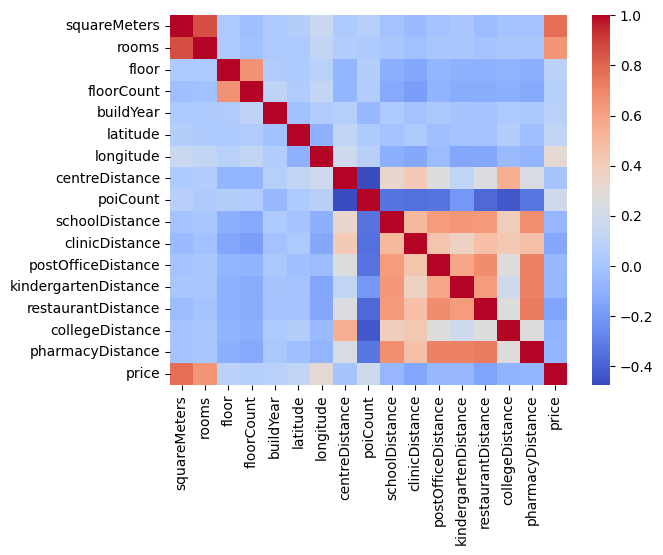

price           1.000000
squareMeters    0.771177
rooms           0.647024
longitude       0.305369
poiCount        0.183928
latitude        0.114977
Name: price, dtype: float64


In [14]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

print(correlation_matrix['price'].sort_values(ascending=False).head(6))


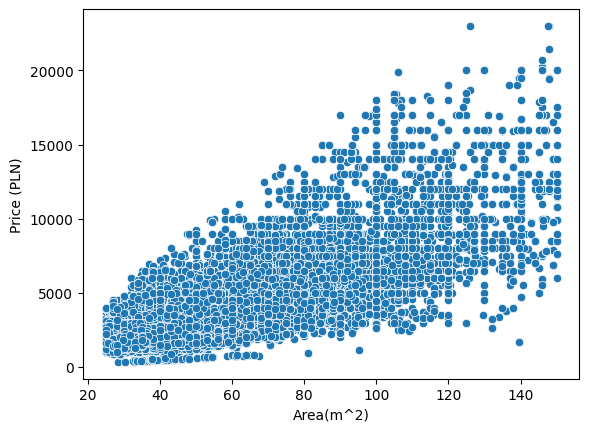

In [15]:
sns.scatterplot(x='squareMeters', y='price', data=df)
plt.xlabel("Area(m^2)")
plt.ylabel("Price (PLN)")
plt.show()

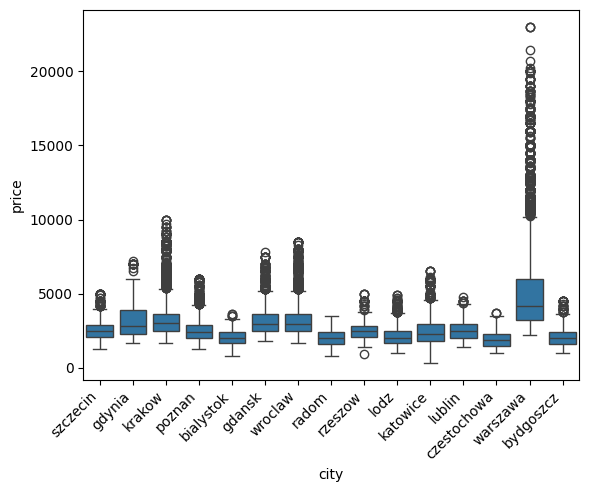

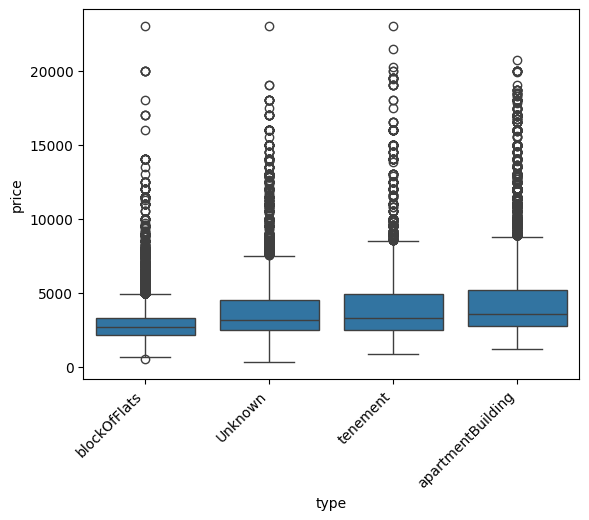

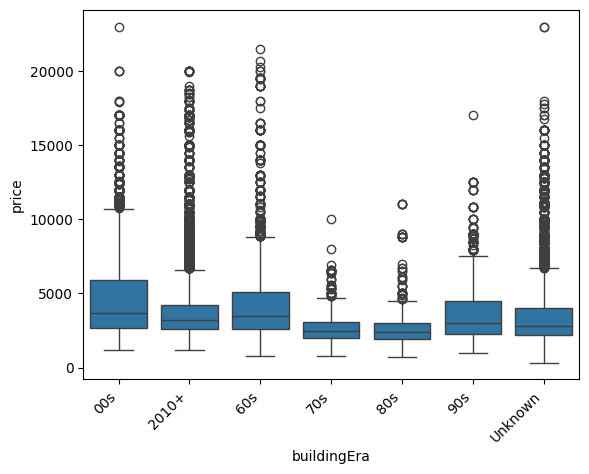

In [16]:
sns.boxplot(x='city', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='type', y='price', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

sns.boxplot(x='buildingEra', y='price', data=df, order=sorted(df['buildingEra'].unique()))
plt.xticks(rotation=45, ha='right')
plt.show()

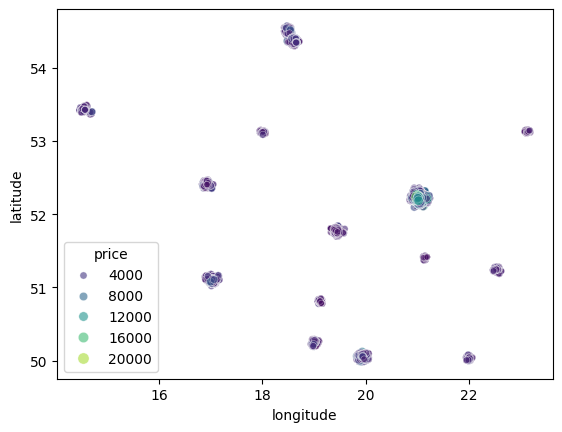

In [17]:
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='price', 
    data=df, 
    palette='viridis', 
    size='price', 
    alpha=0.6
)
plt.show()

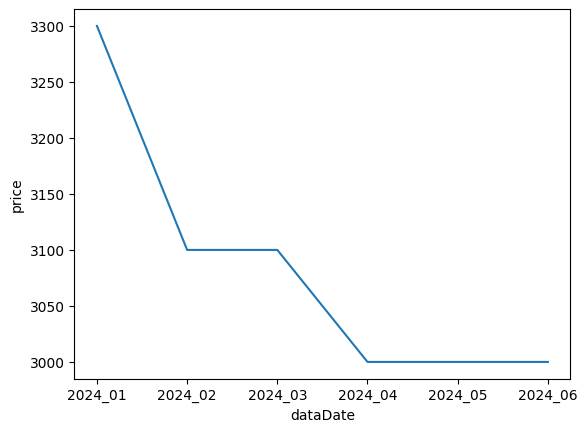

In [18]:
monthly_prices = df.groupby('dataDate')['price'].median().reset_index()
sns.lineplot(x='dataDate',y='price', data=monthly_prices)
plt.show()